# background knowledge

    Before proceeding to our data we should  have background knowledge of our dataset
    
Here are key points summarizing the information provided for each column in the dataset:

1. **ID:**
   - Represents the unique identifier for each subject in the dataset.

2. **Recording:**
   - Denotes the number of the recording for each subject. It helps identify individual recordings within the dataset.

3. **Status:**
   - Indicates the health status of the subjects.
   - 0 = Healthy: Subjects without Parkinson's disease.
   - 1 = PD (Parkinson's Disease): Subjects diagnosed with Parkinson's disease.

4. **Gender:**
   - Represents the gender of the subjects.
   - 0 = Man: Male subjects.
   - 1 = Woman: Female subjects.

5. **Pitch Local Perturbation Measures:**
   - These measures provide insights into variations in pitch or fundamental frequency in voice recordings.
   - Includes relative jitter (Jitter_rel), absolute jitter (Jitter_abs), relative average perturbation (Jitter_RAP), and pitch perturbation quotient (Jitter_PPQ).

6. **Amplitude Perturbation Measures:**
   - These measures capture variations in voice amplitude.
   - Includes local shimmer (Shim_loc), shimmer in dB (Shim_dB), 3-point amplitude perturbation quotient (Shim_APQ3), 5-point amplitude perturbation quotient (Shim_APQ5), and 11-point amplitude perturbation quotient (Shim_APQ11).

7. **Harmonic-to-Noise Ratio Measures:**
   - Reflects the balance between harmonic (voiced) and noise (unvoiced) components in voice recordings.
   - Includes harmonic-to-noise ratio measurements at various frequency bands: HNR05, HNR15, HNR25, HNR35, and HNR38.

8. **Mel Frequency Cepstral Coefficient-Based Spectral Measures:**
   - Represents spectral characteristics of voice recordings using Mel Frequency Cepstral Coefficients (MFCCs).
   - Covers orders MFCC0 to MFCC12 and their corresponding derivatives (Delta0 to Delta12).

9. **Recurrence Period Density Entropy (RPDE):**
   - A measure related to the predictability or regularity of voice patterns.

10. **Detrended Fluctuation Analysis (DFA):**
    - Analyzes the scaling behavior of voice recordings to understand long-term correlations or fluctuations.

11. **Pitch Period Entropy (PPE):**
    - Provides insights into the regularity or entropy of pitch periods in voice recordings.

12. **Glottal-to-Noise Excitation Ratio (GNE):**
    - Measures the ratio between glottal (voice source) and noise components in voice recordings.

These columns represent various acoustic and signal processing features extracted from voice recordings, and they can be used for analyzing and potentially predicting the presence of Parkinson's disease in individuals based on their voice characteristics. Depending on your research goals, some of these features may be more relevant than others, and you may need to conduct further analysis and modeling to determine their significance in disease diagnosis or monitoring.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [5]:
df= pd.read_csv("ReplicatedAcousticFeatures-ParkinsonDatabase.csv")

In [6]:
df.head(20)

ID  Recording  Status  Gender  Jitter_rel  Jitter_abs  Jitter_RAP  \
0   CONT-01          1       0       1     0.25546    0.000015    0.001467   
1   CONT-01          2       0       1     0.36964    0.000022    0.001932   
2   CONT-01          3       0       1     0.23514    0.000013    0.001353   
3   CONT-02          1       0       0     0.29320    0.000017    0.001105   
4   CONT-02          2       0       0     0.23075    0.000015    0.001073   
5   CONT-02          3       0       0     0.16489    0.000010    0.000819   
6   CONT-03          1       0       1     0.22506    0.000014    0.001358   
7   CONT-03          2       0       1     0.23086    0.000015    0.001349   
8   CONT-03          3       0       1     0.22898    0.000015    0.001375   
9   CONT-04          1       0       1     1.31000    0.000103    0.008245   
10  CONT-04          2       0       1     1.06470    0.000082    0.006299   
11  CONT-04          3       0       1     1.04170    0.000082    0.006093   
12  CONT-05          1       0       0     0.78955    0.000103    0.004238   
13  CONT-05          2       0       0     0.53010    0.000069    0.002379   
14  CONT-05          3       0       0     0.48444    0.000064    0.002272   
15  CONT-06          1       0       1     0.40538    0.000028    0.002328   
16  CONT-06          2       0       1     0.41475    0.000028    0.002340   
17  CONT-06          3       0       1     0.54800    0.000037    0.003269   
18  CONT-07          1       0       0     0.52820    0.000048    0.002678   
19  CONT-07          2       0       0     0.64300    0.000060    0.003462   

    Jitter_PPQ  Shim_loc   Shim_dB  ...    Delta3    Delta4    Delta5  \
0     0.001673  0.030256  0.263130  ...  1.407701  1.417218  1.380352   
1     0.002245  0.023146  0.202170  ...  1.331232  1.227338  1.213377   
2     0.001546  0.019338  0.167100  ...  1.412304  1.324674  1.276088   
3     0.001444  0.024716  0.208920  ...  1.501200  1.534170  1.323993   
4     0.001404  0.013119  0.116070  ...  1.508468  1.334511  1.610694   
5     0.001191  0.010666  0.094738  ...  1.480657  1.675417  1.373460   
6     0.001460  0.017181  0.148120  ...  1.712147  1.419443  1.501822   
7     0.001546  0.017775  0.157800  ...  1.535326  1.627976  1.332839   
8     0.001607  0.020110  0.175770  ...  1.620783  1.431508  1.598949   
9     0.006280  0.030742  0.270640  ...  1.541010  1.347021  1.526148   
10    0.005949  0.023969  0.211990  ...  1.396272  1.424300  1.442387   
11    0.006277  0.022837  0.199990  ...  1.615672  1.570263  1.635997   
12    0.004574  0.039162  0.332890  ...  1.346048  1.221651  1.441105   
13    0.003367  0.034966  0.303950  ...  1.497697  1.625862  1.774625   
14    0.002948  0.032814  0.288280  ...  1.341521  1.651409  1.721017   
15    0.002489  0.015854  0.137360  ...  1.239407  1.469535  1.224069   
16    0.002576  0.022903  0.199750  ...  1.493185  1.440555  1.521301   
17    0.003485  0.047940  0.414750  ...  1.579597  1.320496  1.556893   
18    0.003226  0.055880  0.489900  ...  1.434560  1.523053  1.186335   
19    0.003797  0.046695  0.408420  ...  1.707092  1.591572  1.545776   

      Delta6    Delta7    Delta8    Delta9   Delta10   Delta11   Delta12  
0   1.420670  1.451240  1.440295  1.403678  1.405495  1.416705  1.354610  
1   1.352739  1.354242  1.365692  1.322870  1.314549  1.318999  1.323508  
2   1.429634  1.455996  1.368882  1.438053  1.388910  1.305469  1.305402  
3   1.496442  1.472926  1.643177  1.551286  1.638346  1.604008  1.621456  
4   1.685021  1.417614  1.574895  1.640088  1.533666  1.297536  1.382023  
5   1.709614  1.444187  1.383488  1.625396  1.651655  1.652845  1.427623  
6   1.503534  1.486685  1.648505  1.345959  1.741863  1.828781  1.655604  
7   1.254560  1.598743  1.297679  1.526714  1.647910  1.662981  1.609652  
8   1.394543  1.459370  1.313012  1.447470  1.354798  1.585025  1.334293  
9   1.428505  1.516130  1.491684  1.579521  1.374581  1.550638  1.572821  
10  1.43772

In [7]:
df.columns

Index(['ID', 'Recording', 'Status', 'Gender', 'Jitter_rel', 'Jitter_abs',
       'Jitter_RAP', 'Jitter_PPQ', 'Shim_loc', 'Shim_dB', 'Shim_APQ3',
       'Shim_APQ5', 'Shi_APQ11', 'HNR05', 'HNR15', 'HNR25', 'HNR35', 'HNR38',
       'RPDE', 'DFA', 'PPE', 'GNE', 'MFCC0', 'MFCC1', 'MFCC2', 'MFCC3',
       'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8', 'MFCC9', 'MFCC10',
       'MFCC11', 'MFCC12', 'Delta0', 'Delta1', 'Delta2', 'Delta3', 'Delta4',
       'Delta5', 'Delta6', 'Delta7', 'Delta8', 'Delta9', 'Delta10', 'Delta11',
       'Delta12'],
      dtype='object')

In [161]:
df.shape

(240, 48)

In [162]:
df.describe()


Recording      Status      Gender  Jitter_rel  Jitter_abs  Jitter_RAP  \
count  240.000000  240.000000  240.000000  240.000000  240.000000  240.000000   
mean     2.000000    0.500000    0.400000    0.583987    0.000044    0.003172   
std      0.818203    0.501045    0.490922    0.535769    0.000045    0.003373   
min      1.000000    0.000000    0.000000    0.148010    0.000007    0.000678   
25%      1.000000    0.000000    0.000000    0.298260    0.000019    0.001551   
50%      2.000000    0.500000    0.000000    0.481455    0.000035    0.002337   
75%      3.000000    1.000000    1.000000    0.681685    0.000056    0.003678   
max      3.000000    1.000000    1.000000    6.838200    0.000550    0.043843   

       Jitter_PPQ    Shim_loc     Shim_dB   Shim_APQ3  ...      Delta3  \
count  240.000000  240.000000  240.000000  240.000000  ...  240.000000   
mean     0.003532    0.038428    0.336832    0.021499  ...    1.343238   
std      0.004449    0.023213    0.205905    0.013787  ...    0.198174   
min      0.001036    0.007444    0.064989    0.003344  ...    0.766458   
25%      0.001867    0.024336    0.211785    0.012910  ...    1.208624   
50%      0.002870    0.032960    0.287885    0.018571  ...    1.351015   
75%      0.003991    0.045475    0.399860    0.025784  ...    1.488878   
max      0.065199    0.192600    1.747600    0.113240  ...    1.860588   

           Delta4      Delta5      Delta6      Delta7      Delta8      Delta9  \
count  240.000000  240.000000  240.000000  240.000000  240.000000  240.000000   
mean     1.348914    1.337717    1.341786    1.340895    1.343978    1.341472   
std      0.212008    0.204978    0.209407    0.213689    0.211364    0.204085   
min      0.840133    0.741690    0.759689    0.764649    0.762798    0.811942   
25%      1.221101    1.197868    1.194186    1.194138    1.191881    1.189515   
50%      1.342237    1.337233    1.338437    1.344416    1.335517    1.349243   
75%      1.470287    1.485597    1.496845    1.490389    1.495355    1.475330   
max      2.038241    1.785984    1.988090    1.872799    1.920131    1.943331   

          Delta10     Delta11     Delta12  
count  240.000000  240.000000  240.000000  
mean     1.331433    1.346381    1.346144  
std      0.211297    0.221484    0.208819  
min      0.777012    0.643132    0.748411  
25%      1.192397    1.202525    1.206559  
50%      1.333345    1.347297    1.331212  
75%      1.472589    1.506674    1.475235  
max      1.949679    1.918392    1.930103  

[8 rows x 47 columns]

In [163]:
df["ID"].nunique()

80

each row is one of three replications of an individual subject, and these replications are not independent.

In [160]:
df.duplicated().sum()

0

In [177]:
df["ID"].duplicated().sum()

160

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          240 non-null    object 
 1   Recording   240 non-null    int64  
 2   Status      240 non-null    int64  
 3   Gender      240 non-null    int64  
 4   Jitter_rel  240 non-null    float64
 5   Jitter_abs  240 non-null    float64
 6   Jitter_RAP  240 non-null    float64
 7   Jitter_PPQ  240 non-null    float64
 8   Shim_loc    240 non-null    float64
 9   Shim_dB     240 non-null    float64
 10  Shim_APQ3   240 non-null    float64
 11  Shim_APQ5   240 non-null    float64
 12  Shi_APQ11   240 non-null    float64
 13  HNR05       240 non-null    float64
 14  HNR15       240 non-null    float64
 15  HNR25       240 non-null    float64
 16  HNR35       240 non-null    float64
 17  HNR38       240 non-null    float64
 18  RPDE        240 non-null    float64
 19  DFA         240 non-null    f

In [9]:
df1 = df.copy()

In [10]:
df1.drop(columns=["ID"] , inplace=True)

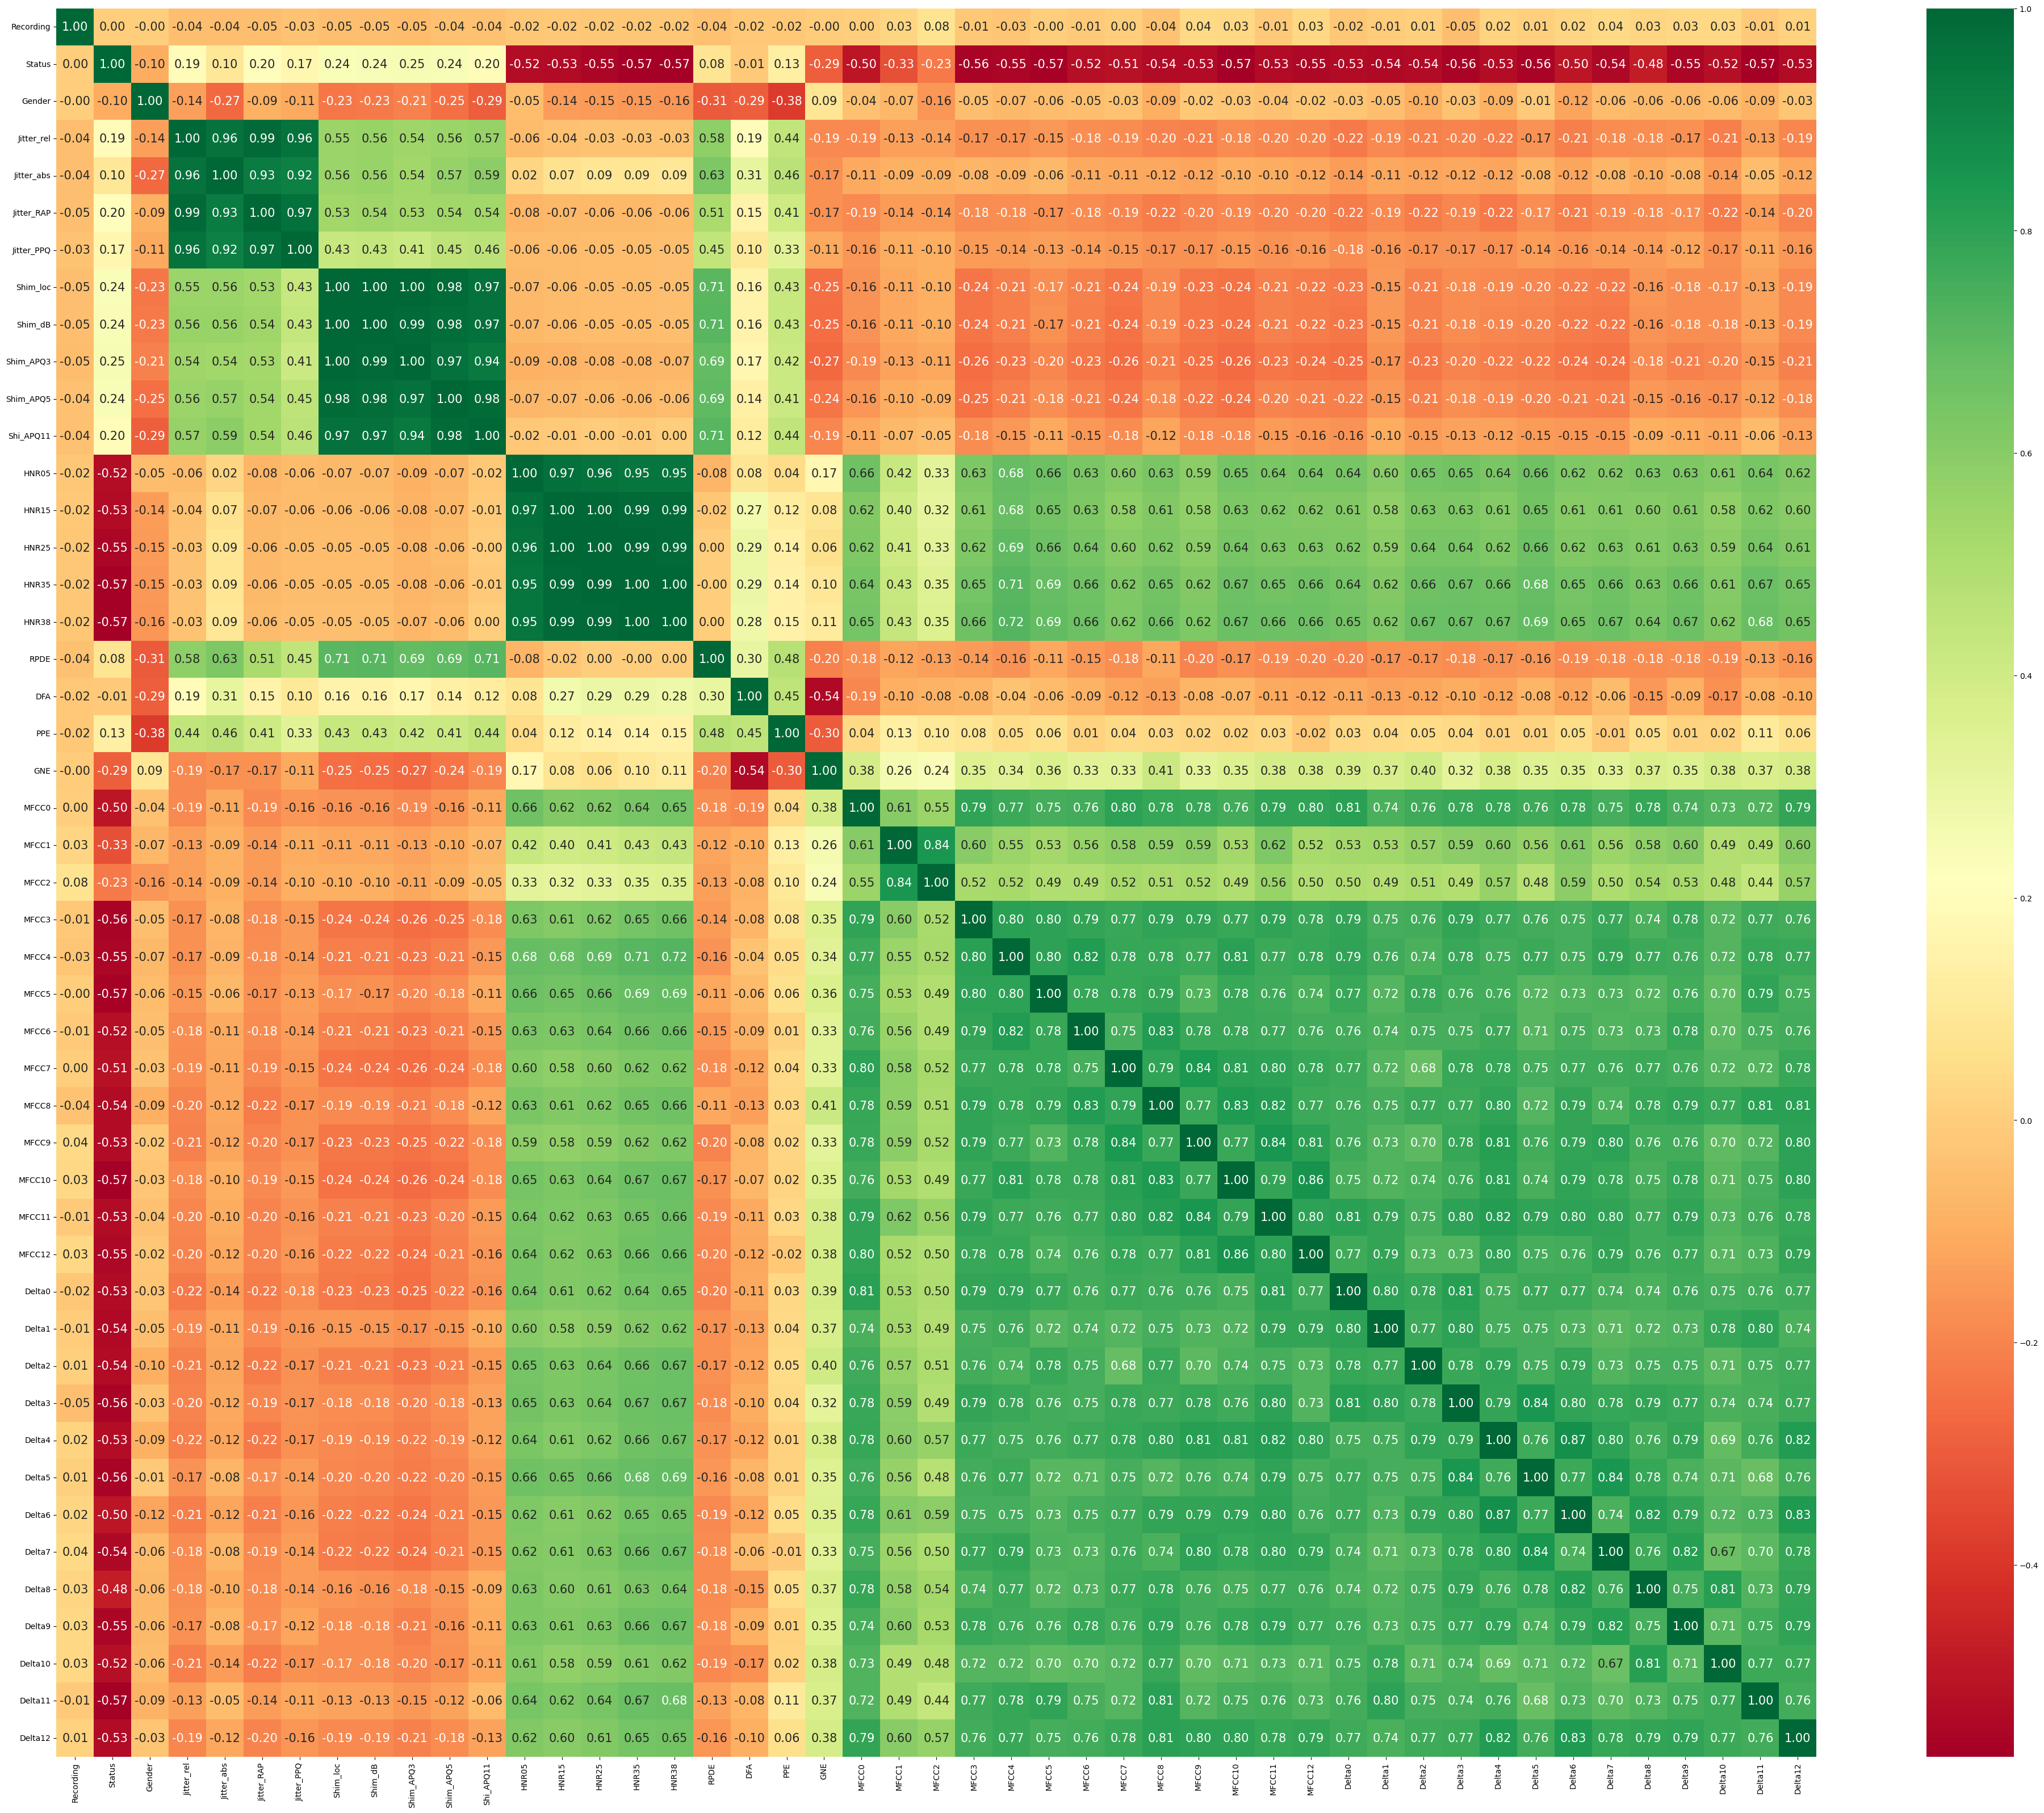

In [183]:
import seaborn as sns
# figure size
plt.figure(figsize=(50, 40))
# correlation matrix
dataplot = sns.heatmap(df1.corr(), annot_kws={"size": 15} , annot=True, fmt='.2f', cmap="RdYlGn")

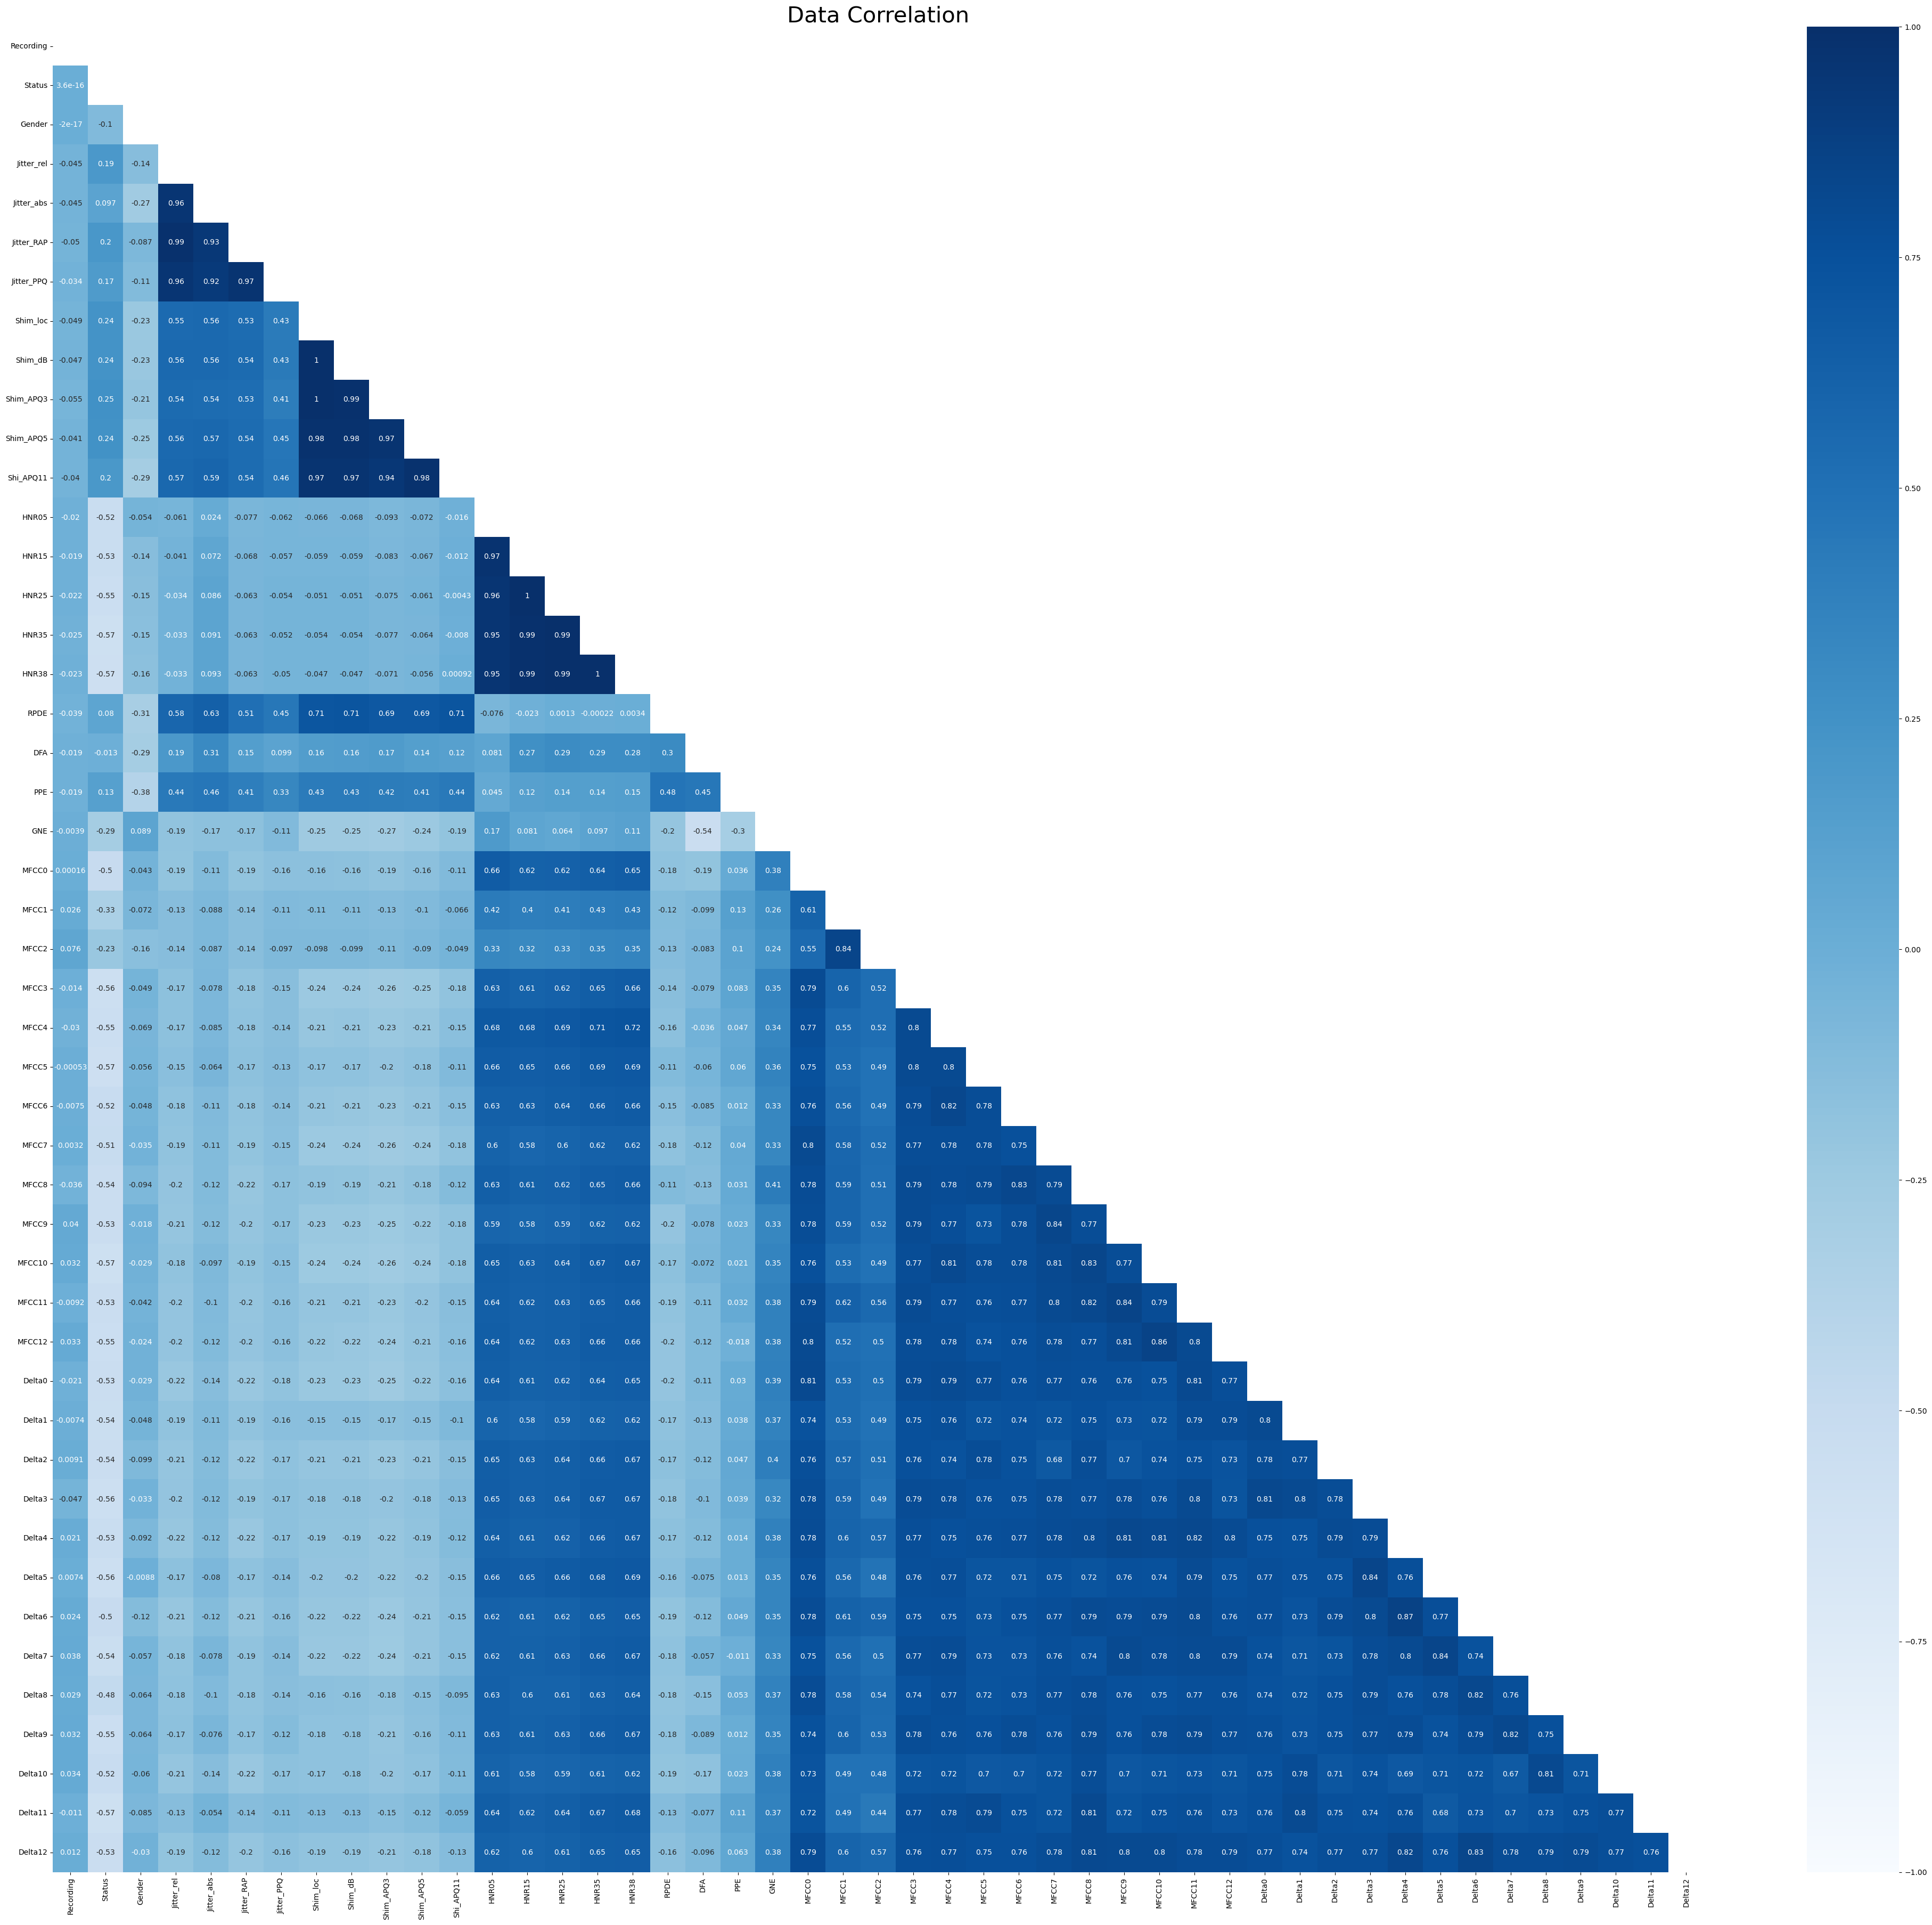

In [146]:
fig, ax = plt.subplots(figsize=(50, 45))
mask=np.triu(np.ones_like(df.drop(columns=['ID']).corr()))
sns.heatmap(df1.corr(), mask = mask, annot = True, cmap = "Blues", vmin = -1, vmax = 1)
plt.title('Data Correlation', color = 'black', fontsize = 30)
plt.show()

In [627]:
df1.columns

Index(['Recording', 'Status', 'Gender', 'Jitter_rel', 'Jitter_abs',
       'Jitter_RAP', 'Jitter_PPQ', 'Shim_loc', 'Shim_dB', 'Shim_APQ3',
       'Shim_APQ5', 'Shi_APQ11', 'HNR05', 'HNR15', 'HNR25', 'HNR35', 'HNR38',
       'RPDE', 'DFA', 'PPE', 'GNE', 'MFCC0', 'MFCC1', 'MFCC2', 'MFCC3',
       'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8', 'MFCC9', 'MFCC10',
       'MFCC11', 'MFCC12', 'Delta0', 'Delta1', 'Delta2', 'Delta3', 'Delta4',
       'Delta5', 'Delta6', 'Delta7', 'Delta8', 'Delta9', 'Delta10', 'Delta11',
       'Delta12'],
      dtype='object')

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Status', ylabel='count'>

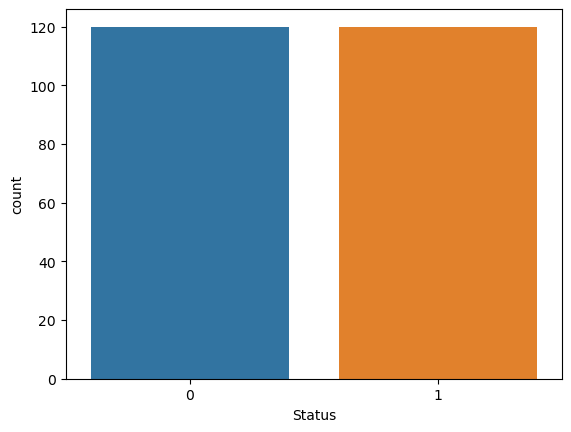

In [148]:
sns.countplot(data= df1 , x = "Status")

In [150]:
df1["Status"].value_counts()

Status
0    120
1    120
Name: count, dtype: int64

In [151]:
df1.groupby('Status')["Gender"].mean()

Status
0    0.45
1    0.35
Name: Gender, dtype: float64

Status
0    [[Axes(0.125,0.7925;0.0880682x0.0875), Axes(0....
1    [[Axes(0.125,0.7925;0.0880682x0.0875), Axes(0....
dtype: object

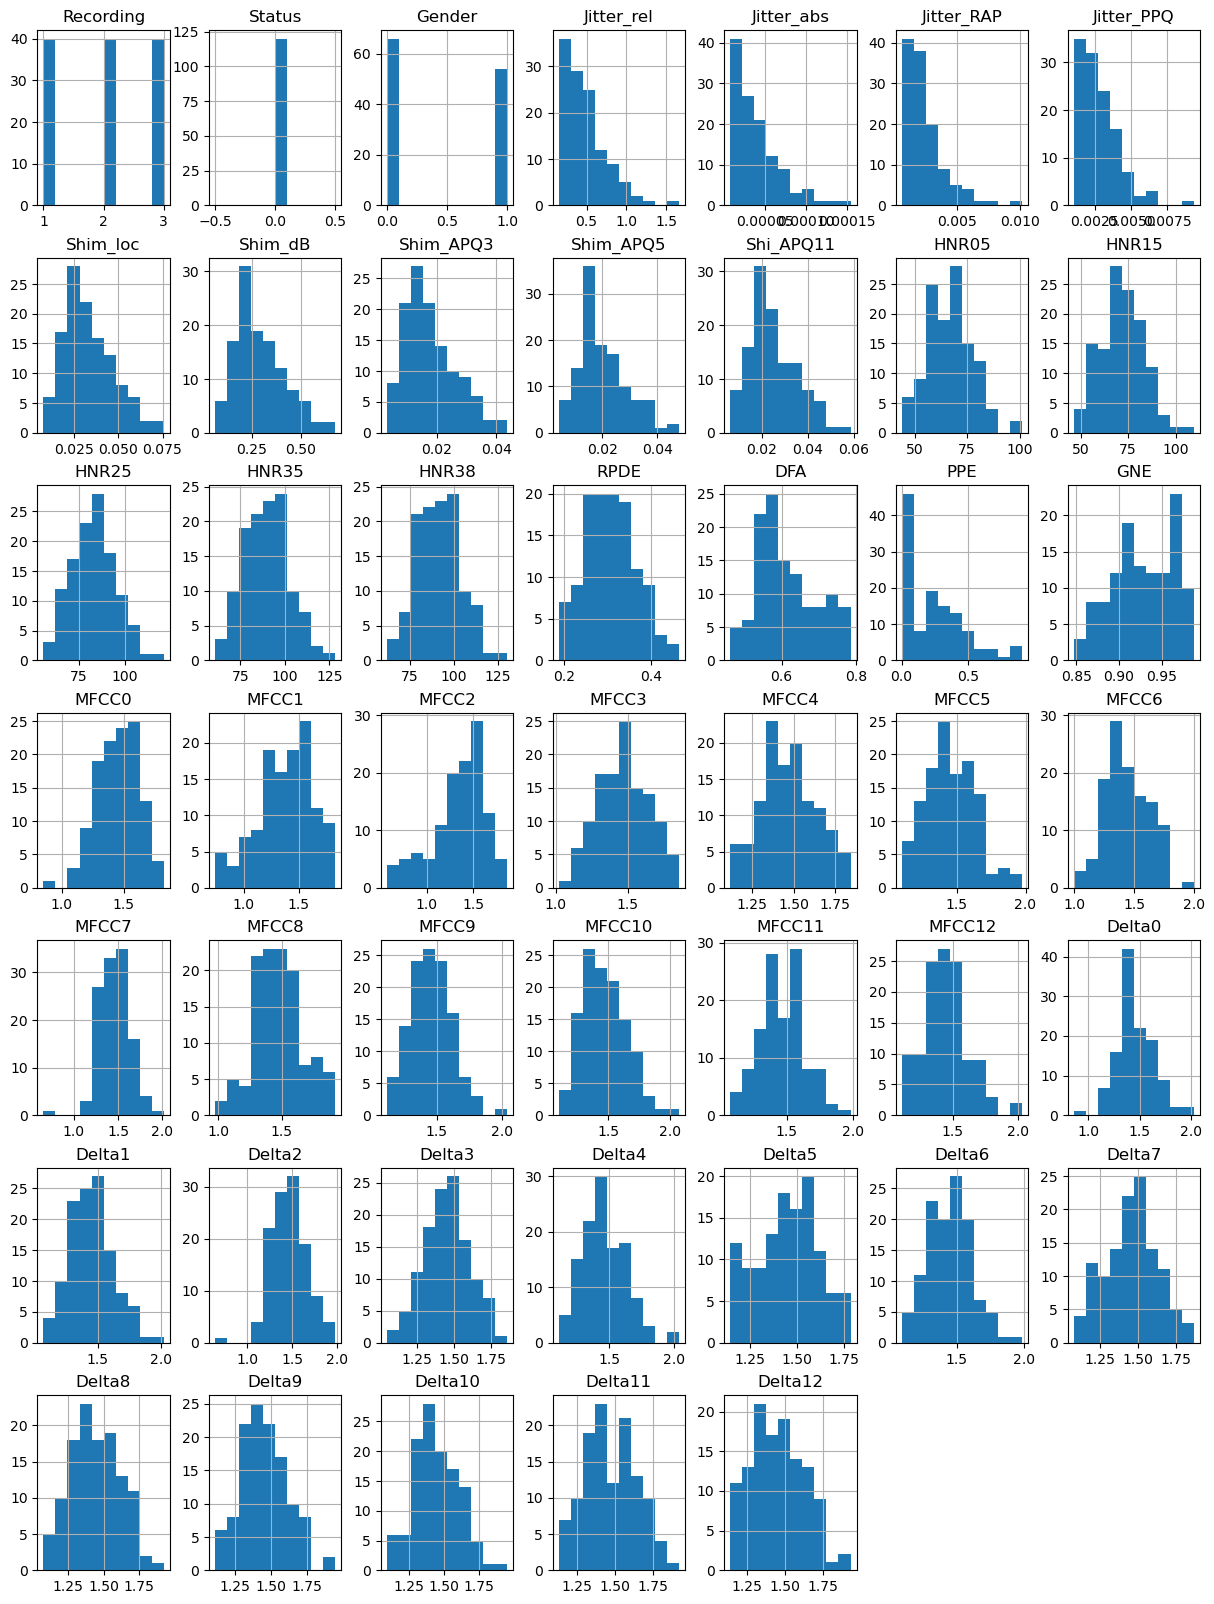

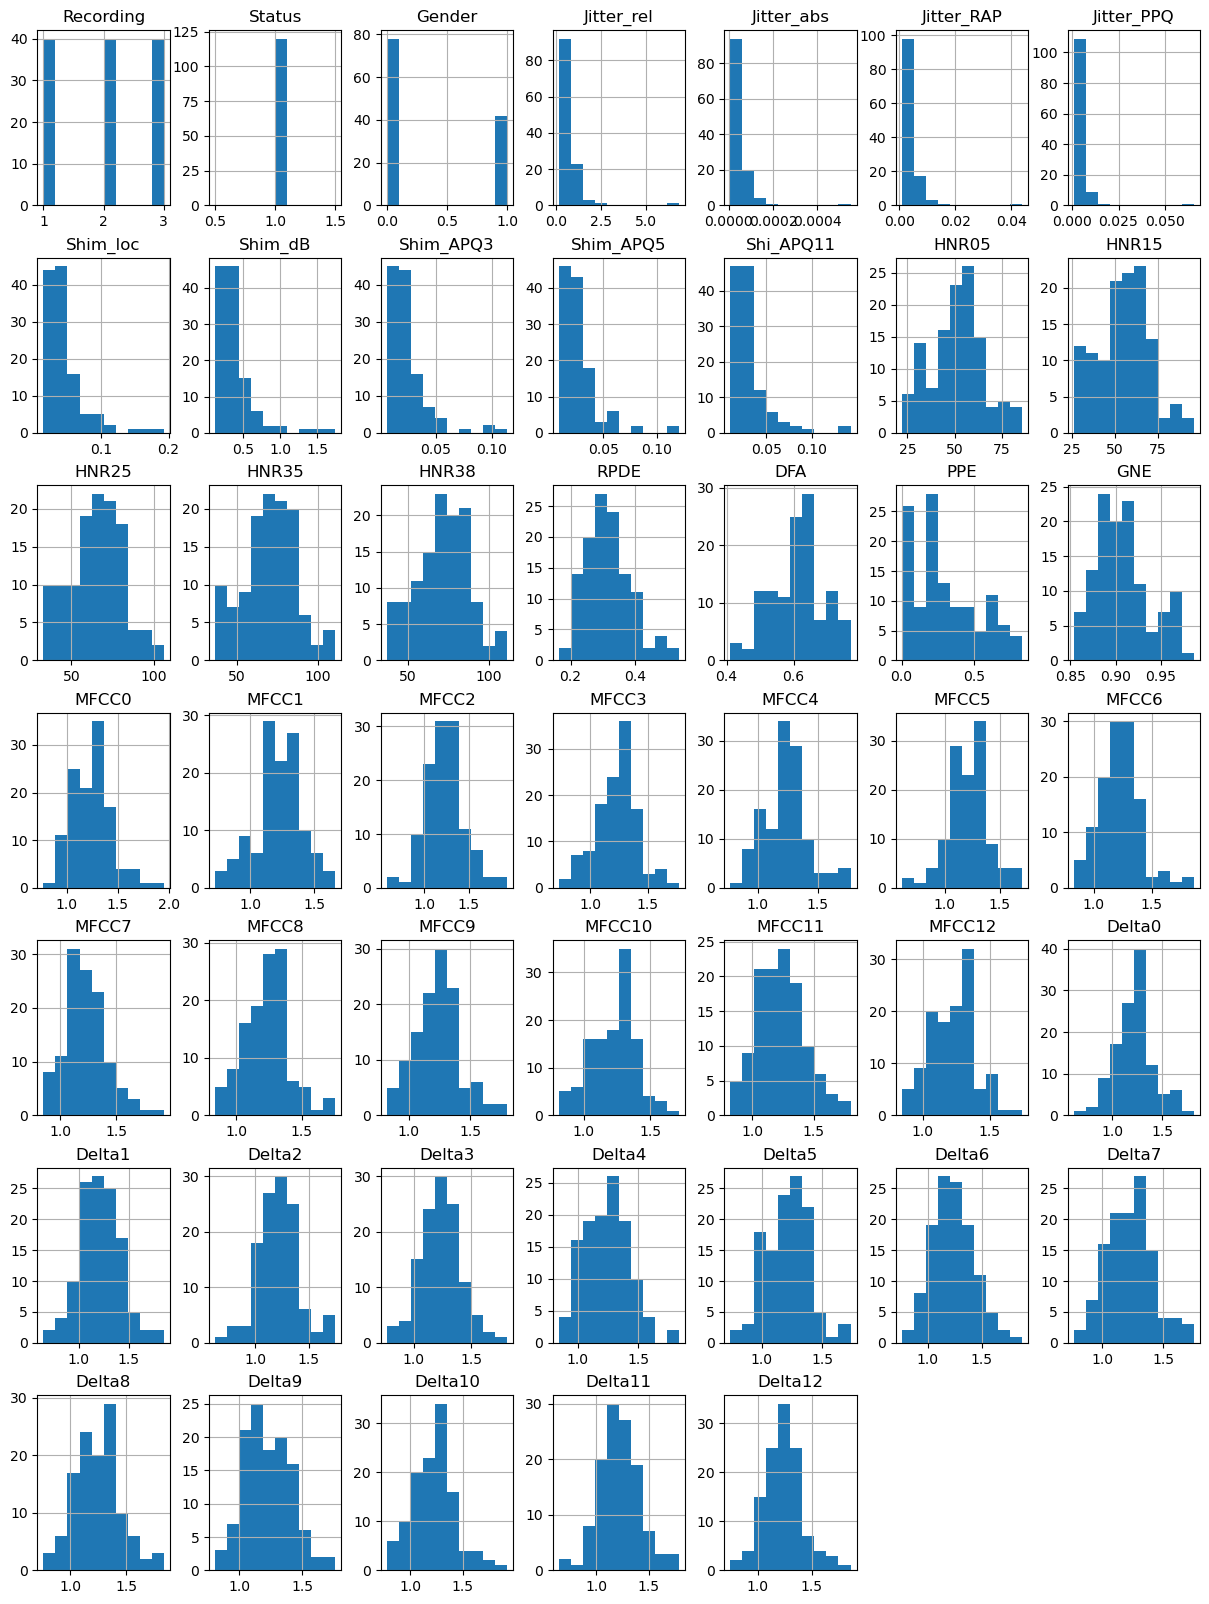

In [156]:
df1.groupby('Status').hist(figsize=(15, 20))

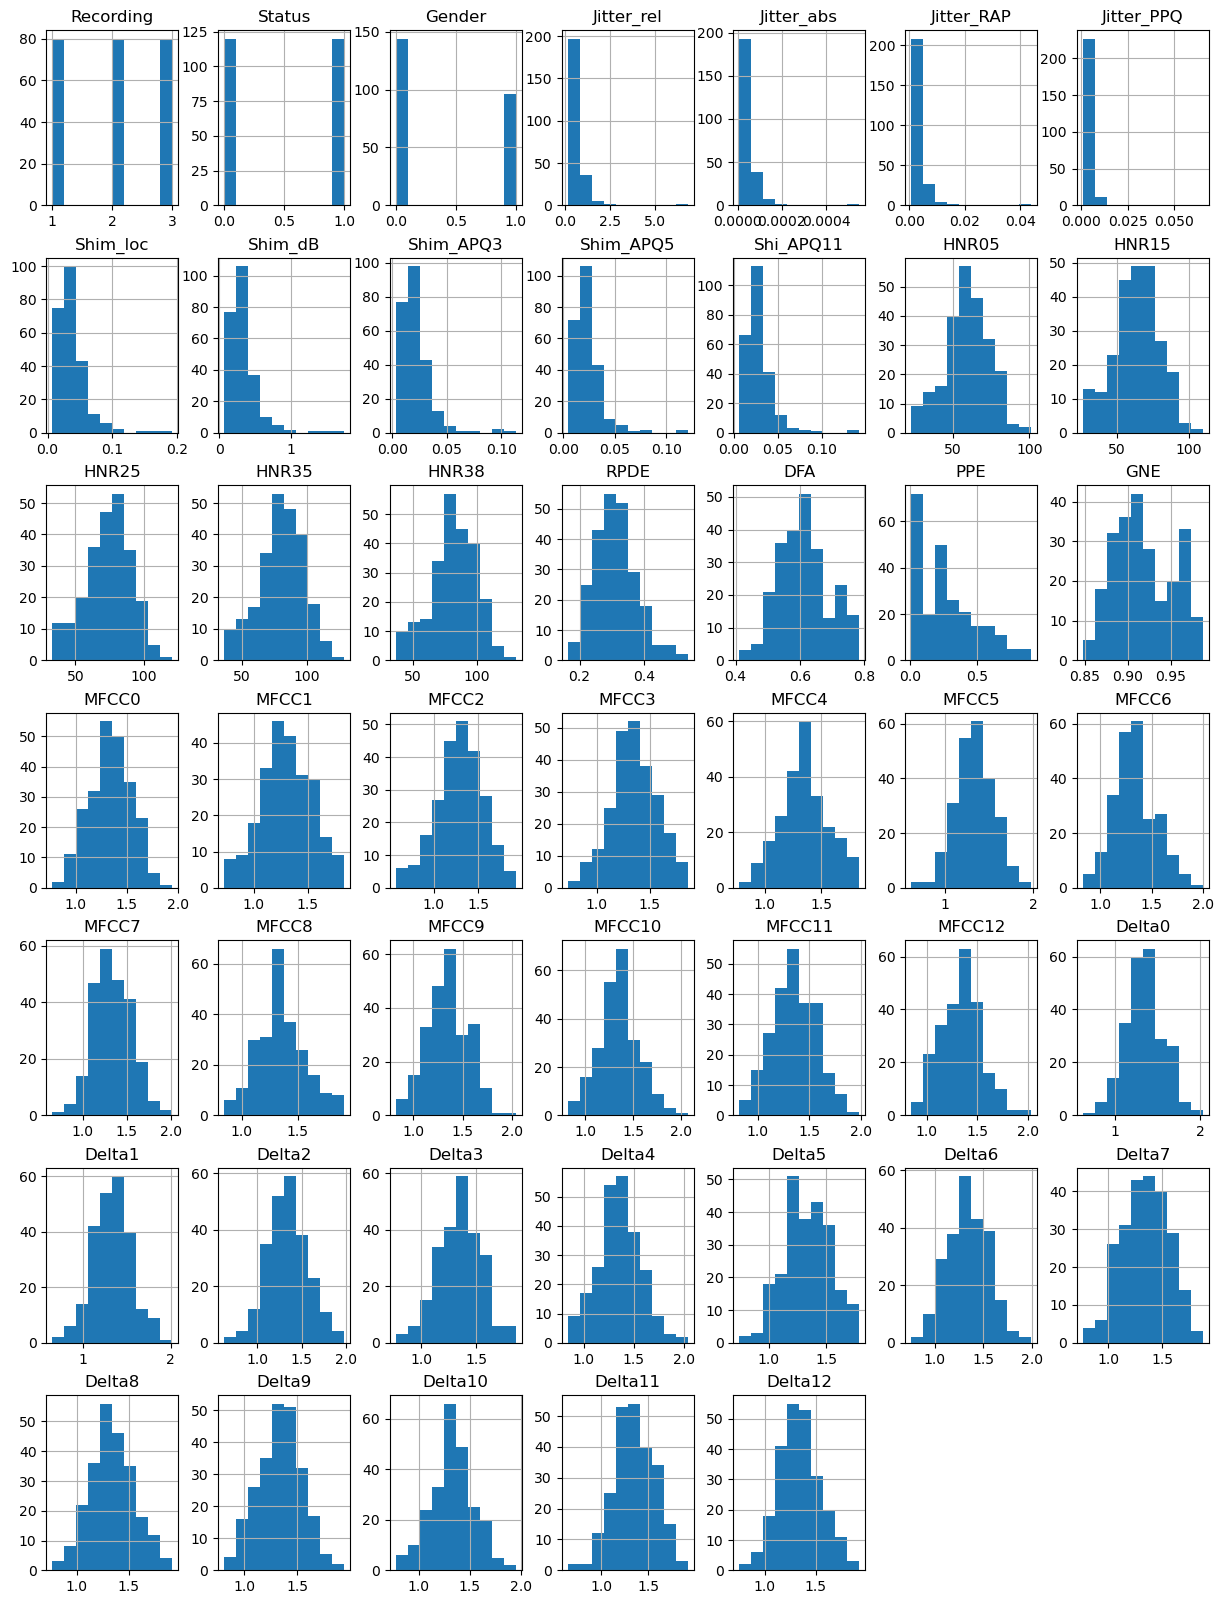

In [155]:
# plotting imports
import matplotlib.pyplot as plt
# analyze the features 
df1.hist(figsize=(15,20))
plt.show()

# Feature Engineering

In [56]:
df1.corr()["Status"].round(2) # how much each column affeect the status column

Recording     0.00
Status        1.00
Gender       -0.10
Jitter_rel    0.19
Jitter_abs    0.10
Jitter_RAP    0.20
Jitter_PPQ    0.17
Shim_loc      0.24
Shim_dB       0.24
Shim_APQ3     0.25
Shim_APQ5     0.24
Shi_APQ11     0.20
HNR05        -0.52
HNR15        -0.53
HNR25        -0.55
HNR35        -0.57
HNR38        -0.57
RPDE          0.08
DFA          -0.01
PPE           0.13
GNE          -0.29
MFCC0        -0.50
MFCC1        -0.33
MFCC2        -0.23
MFCC3        -0.56
MFCC4        -0.55
MFCC5        -0.57
MFCC6        -0.52
MFCC7        -0.51
MFCC8        -0.54
MFCC9        -0.53
MFCC10       -0.57
MFCC11       -0.53
MFCC12       -0.55
Delta0       -0.53
Delta1       -0.54
Delta2       -0.54
Delta3       -0.56
Delta4       -0.53
Delta5       -0.56
Delta6       -0.50
Delta7       -0.54
Delta8       -0.48
Delta9       -0.55
Delta10      -0.52
Delta11      -0.57
Delta12      -0.53
Name: Status, dtype: float64

In [243]:
# Calculating the correlation and filter for values less than -0.4
correlation_filter = (df1.corr()["Status"].round(2).sort_values() < -0.4) | (df1.corr()["Status"].round(2).sort_values() >0.2)

# Use boolean indexing to get the exact values that are True
filtered_values = df1.corr()["Status"].round(2).sort_values()[correlation_filter]
filtered_values



HNR35       -0.57
MFCC10      -0.57
Delta11     -0.57
HNR38       -0.57
MFCC5       -0.57
MFCC3       -0.56
Delta5      -0.56
Delta3      -0.56
Delta9      -0.55
MFCC12      -0.55
HNR25       -0.55
MFCC4       -0.55
Delta7      -0.54
MFCC8       -0.54
Delta2      -0.54
Delta1      -0.54
MFCC11      -0.53
Delta12     -0.53
Delta0      -0.53
Delta4      -0.53
HNR15       -0.53
MFCC9       -0.53
HNR05       -0.52
Delta10     -0.52
MFCC6       -0.52
MFCC7       -0.51
MFCC0       -0.50
Delta6      -0.50
Delta8      -0.48
Shim_APQ5    0.24
Shim_dB      0.24
Shim_loc     0.24
Shim_APQ3    0.25
Status       1.00
Name: Status, dtype: float64

In [244]:
new_columns = filtered_values.index
new_columns

Index(['HNR35', 'MFCC10', 'Delta11', 'HNR38', 'MFCC5', 'MFCC3', 'Delta5',
       'Delta3', 'Delta9', 'MFCC12', 'HNR25', 'MFCC4', 'Delta7', 'MFCC8',
       'Delta2', 'Delta1', 'MFCC11', 'Delta12', 'Delta0', 'Delta4', 'HNR15',
       'MFCC9', 'HNR05', 'Delta10', 'MFCC6', 'MFCC7', 'MFCC0', 'Delta6',
       'Delta8', 'Shim_APQ5', 'Shim_dB', 'Shim_loc', 'Shim_APQ3', 'Status'],
      dtype='object')

In [334]:
df_new = df[new_columns]
df_new.drop(columns=["Status"] , inplace = True)
df_new

HNR35    MFCC10   Delta11      HNR38     MFCC5     MFCC3    Delta5  \
0    77.626729  1.367540  1.416705  77.538042  1.209225  1.329085  1.380352   
1    79.989228  1.370643  1.318999  80.269783  1.246375  1.187177  1.213377   
2    78.930502  1.362594  1.305469  79.033510  1.334447  1.346296  1.276088   
3    84.367682  1.493691  1.604008  84.252430  1.590510  1.498323  1.323993   
4    91.033967  1.557644  1.297536  91.145189  1.258557  1.613747  1.610694   
..         ...       ...       ...        ...       ...       ...       ...   
235  43.165327  1.134914  1.107824  44.085825  1.146306  1.149514  1.099866   
236  52.135100  1.119685  1.096073  53.417630  1.055106  1.108991  1.101819   
237  82.794477  1.391191  1.383364  83.509902  1.364689  1.367463  1.281551   
238  86.826843  1.329500  1.423062  87.382895  1.348004  1.335188  1.461323   
239  81.623306  1.310566  1.315691  82.411538  1.255646  1.280744  1.531764   

       Delta3    Delta9    MFCC12  ...   Delta10     MFCC6     MFCC7  \
0    1.407701  1.403678  1.393809  ...  1.405495  1.239354  1.277002   
1    1.331232  1.322870  1.344655  ...  1.314549  1.283629  1.302498   
2    1.412304  1.438053  1.277938  ...  1.388910  1.391798  1.349621   
3    1.501200  1.551286  1.383606  ...  1.638346  1.626319  1.645811   
4    1.508468  1.640088  1.576015  ...  1.533666  1.385013  1.452518   
..        ...       ...       ...  ...       ...       ...       ...   
235  1.116409  1.167076  1.071029  ...  1.132436  1.137069  1.122076   
236  1.107477  1.126667  1.112830  ...  1.158444  1.093827  1.097773   
237  1.335189  1.343193  1.341734  ...  1.374330  1.384608  1.270682   
238  1.327629  1.361937  1.331995  ...  1.331923  1.272970  1.436992   
239  1.440003  1.304214  1.366887  ...  1.395653  1.352578  1.323893   

        MFCC0    Delta6    Delta8  Shim_APQ5  Shim_dB  Shim_loc  Shim_APQ3  
0    1.319502  1.420670  1.440295   0.019660  0.26313  0.030256   0.017463  
1    1.215251  1.352739  1.365692   0.014097  0.20217  0.023146   0.013010  
2    1.426075  1.429634  1.368882   0.012683  0.16710  0.019338   0.011049  
3    1.495235  1.496442  1.643177   0.015696  0.20892  0.024716   0.014525  
4    1.516959  1.685021  1.574895   0.008385  0.11607  0.013119   0.006461  
..        ...       ...       ...        ...      ...       ...        ...  
235  1.145728  1.080320  1.117423   0.010232  0.14928  0.016868   0.008835  
236  1.097069  1.114161  1.140705   0.011578  0.16720  0.017923   0.008436  
237  1.372905  1.367171  1.367095   0.015441  0.24182  0.028040   0.015937  
238  1.296298  1.350599  1.415338   0.027626  0.58002  0.064605   0.041295  
239  1.376982  1.471198  1.415942   0.012432  0.17087  0.019914   0.011060  

[240 rows x 33 columns]

In [335]:
df_new

HNR35    MFCC10   Delta11      HNR38     MFCC5     MFCC3    Delta5  \
0    77.626729  1.367540  1.416705  77.538042  1.209225  1.329085  1.380352   
1    79.989228  1.370643  1.318999  80.269783  1.246375  1.187177  1.213377   
2    78.930502  1.362594  1.305469  79.033510  1.334447  1.346296  1.276088   
3    84.367682  1.493691  1.604008  84.252430  1.590510  1.498323  1.323993   
4    91.033967  1.557644  1.297536  91.145189  1.258557  1.613747  1.610694   
..         ...       ...       ...        ...       ...       ...       ...   
235  43.165327  1.134914  1.107824  44.085825  1.146306  1.149514  1.099866   
236  52.135100  1.119685  1.096073  53.417630  1.055106  1.108991  1.101819   
237  82.794477  1.391191  1.383364  83.509902  1.364689  1.367463  1.281551   
238  86.826843  1.329500  1.423062  87.382895  1.348004  1.335188  1.461323   
239  81.623306  1.310566  1.315691  82.411538  1.255646  1.280744  1.531764   

       Delta3    Delta9    MFCC12  ...   Delta10     MFCC6     MFCC7  \
0    1.407701  1.403678  1.393809  ...  1.405495  1.239354  1.277002   
1    1.331232  1.322870  1.344655  ...  1.314549  1.283629  1.302498   
2    1.412304  1.438053  1.277938  ...  1.388910  1.391798  1.349621   
3    1.501200  1.551286  1.383606  ...  1.638346  1.626319  1.645811   
4    1.508468  1.640088  1.576015  ...  1.533666  1.385013  1.452518   
..        ...       ...       ...  ...       ...       ...       ...   
235  1.116409  1.167076  1.071029  ...  1.132436  1.137069  1.122076   
236  1.107477  1.126667  1.112830  ...  1.158444  1.093827  1.097773   
237  1.335189  1.343193  1.341734  ...  1.374330  1.384608  1.270682   
238  1.327629  1.361937  1.331995  ...  1.331923  1.272970  1.436992   
239  1.440003  1.304214  1.366887  ...  1.395653  1.352578  1.323893   

        MFCC0    Delta6    Delta8  Shim_APQ5  Shim_dB  Shim_loc  Shim_APQ3  
0    1.319502  1.420670  1.440295   0.019660  0.26313  0.030256   0.017463  
1    1.215251  1.352739  1.365692   0.014097  0.20217  0.023146   0.013010  
2    1.426075  1.429634  1.368882   0.012683  0.16710  0.019338   0.011049  
3    1.495235  1.496442  1.643177   0.015696  0.20892  0.024716   0.014525  
4    1.516959  1.685021  1.574895   0.008385  0.11607  0.013119   0.006461  
..        ...       ...       ...        ...      ...       ...        ...  
235  1.145728  1.080320  1.117423   0.010232  0.14928  0.016868   0.008835  
236  1.097069  1.114161  1.140705   0.011578  0.16720  0.017923   0.008436  
237  1.372905  1.367171  1.367095   0.015441  0.24182  0.028040   0.015937  
238  1.296298  1.350599  1.415338   0.027626  0.58002  0.064605   0.041295  
239  1.376982  1.471198  1.415942   0.012432  0.17087  0.019914   0.011060  

[240 rows x 33 columns]

# MODEL BUILDING

In [336]:
X=df1.drop(columns=["Status"])
y = df1["Status"]

In [337]:
print(X.shape)
print(y.shape)
print(df_new.shape)

(240, 46)
(240,)
(240, 33)


In [394]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_new, X_test_new, y_train, y_test = train_test_split(df_new, y, test_size=0.3, random_state=42) # another splittiing 


In [395]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_train_new.shape)
print(X_test_new.shape)

(168, 46)
(168,)
(72, 46)
(72,)
(168, 33)
(72, 33)


### RandomForestClassifier`

In [416]:
ran_clf = RandomForestClassifier(n_estimators=500, max_samples=100,
bootstrap=True , oob_score=True,  n_jobs=-1,random_state=42)
ran_clf.fit(X_train, y_train)

RandomForestClassifier(max_samples=100, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=42)

In [415]:
ran_clf_new_cols = RandomForestClassifier(n_estimators=500, max_samples=100 ,
bootstrap=True , oob_score=True,n_jobs=-1 ,random_state=42)
ran_clf_new_cols.fit(X_train_new, y_train) # for selected cols

RandomForestClassifier(max_samples=100, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=42)

In [417]:
y_pred_rf = ran_clf.predict(X_test)
y_pred_rf_new_Cols = ran_clf_new_cols.predict(X_test_new)

In [614]:
from sklearn.metrics import accuracy_score
print("accuracy score for original Random Forest :",accuracy_score(y_pred_rf , y_test))
print("accuracy score for New Random Forest:",accuracy_score(y_pred_rf_new_Cols , y_test))

accuracy score for original Random Forest : 0.8055555555555556
accuracy score for New Random Forest: 0.7916666666666666


### cross_val_score 

In [617]:
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ran_clf , X_train , y_train, cv=3, scoring='accuracy')
scores_for_new_cols = cross_val_score(ran_clf_new_cols , X_train_new , y_train, cv=3, scoring='accuracy')
print("Cross_val_score score for original Random Forest :",scores.mean().round(2))
print("Cross_val_score score for original Random Forest :",scores_for_new_cols.mean().round(2))

Cross_val_score score for original Random Forest : 0.77
Cross_val_score score for original Random Forest : 0.78


### OOB SCORE

In [524]:
ran_clf.oob_score_ 

0.8095238095238095

In [421]:
ran_clf_new_cols.oob_score_

0.8035714285714286

### Classification Report

In [422]:
from sklearn.metrics import classification_report
print("Random Forest Classification Report:", "\n", classification_report(y_pred_rf , y_test ,target_names= ["Healthy","PD"] ))

Random Forest Classification Report: 
               precision    recall  f1-score   support

     Healthy       0.80      0.80      0.80        35
          PD       0.81      0.81      0.81        37

    accuracy                           0.81        72
   macro avg       0.81      0.81      0.81        72
weighted avg       0.81      0.81      0.81        72



In [618]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("Scores for original random forest : " )
print("precision_score",precision_score(y_test,y_pred_rf))
print("recall_score",recall_score(y_test,y_pred_rf))
print("f1_score",f1_score(y_test,y_pred_rf))
print("roc_auc_score",roc_auc_score(y_test,y_pred_rf))

Scores for original random forest : 
precision_score 0.8108108108108109
recall_score 0.8108108108108109
f1_score 0.8108108108108109
roc_auc_score 0.8054054054054056


In [619]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("Scores for new random forest : " )

print("precision_score",precision_score(y_test,y_pred_rf_new_Cols))
print("recall_score",recall_score(y_test,y_pred_rf_new_Cols))
print("f1_score",f1_score(y_test,y_pred_rf_new_Cols))
print("roc_auc_score",roc_auc_score(y_test,y_pred_rf_new_Cols))

Scores for new random forest : 
precision_score 0.7894736842105263
recall_score 0.8108108108108109
f1_score 0.8
roc_auc_score 0.7911196911196913


### ROC SCORES

In [425]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(ran_clf, X_train, y_train, cv=3 , method="predict_proba") # for orginal Random forest

In [426]:
y_scores_1 = cross_val_predict(ran_clf_new_cols, X_train_new, y_train, cv=3 , method="predict_proba") # Scores for new random forest : " )


In [427]:
y_scores[5]

array([0.744, 0.256])

In [428]:
y_scores_1[5]

array([0.734, 0.266])

In [429]:
y_scores_forest = y_scores[:, 1] # we have taken only positive class's probability
y_scores_forest_new = y_scores_1[:, 1] # we have taken only positive class's probability


# ROC Curve and AUC

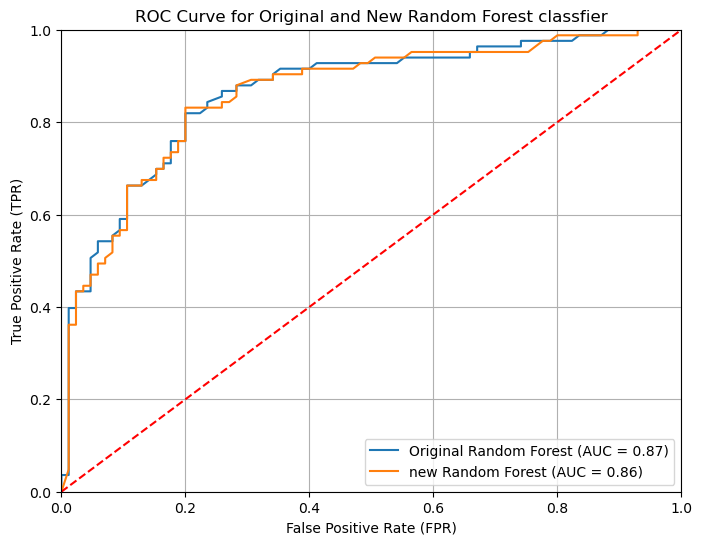

In [620]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have y_true and y_scores for both Classifier A and Classifier B
y_true_a, y_scores_a = y_train, y_scores_forest
y_true_b, y_scores_b = y_train, y_scores_forest_new

# Calculate ROC curves for both classifiers
fpr_a, tpr_a, _ = roc_curve(y_true_a, y_scores_a)
fpr_b, tpr_b, _ = roc_curve(y_true_b, y_scores_b)

# Calculate AUC for both classifiers
auc_a = roc_auc_score(y_true_a, y_scores_a)
auc_b = roc_auc_score(y_true_b, y_scores_b)

# Plot ROC curves for both classifiers on the same graph
plt.figure(figsize=(8, 6))
plt.plot(fpr_a, tpr_a, label=f'Original Random Forest (AUC = {auc_a:.2f})')
plt.plot(fpr_b, tpr_b, label=f'new Random Forest (AUC = {auc_b:.2f})')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Original and New Random Forest classfier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [612]:
print((fpr_a.mean())) # for good results our fpr should be less
print(tpr_a.mean()) # for good results our tpr should be high

0.31699346405228757
0.6914323962516734


    The x-axis represents FPR, which is the fraction of false positives out of all actual negatives.
    The y-axis represents TPR, which is the fraction of true positives out of all actual positives.
    The curve typically starts at (0,0) and moves toward the upper-left corner.
    
    High TPR (Recall):

        When TPR is high, it means that the classifier is good at correctly identifying positive samples.
        The curve will be closer to the upper-left corner of the plot.
        
    Low FPR:

        When FPR is low, it means that the classifier is not producing many false alarms (false positives).
        The curve will be closer to the lower-left corner of the plot.

    A higher AUC-ROC indicates better classifier performance.
    The AUC-PR measures the overall performance of the classifier across different threshold values.


# Precision-Recall Curve

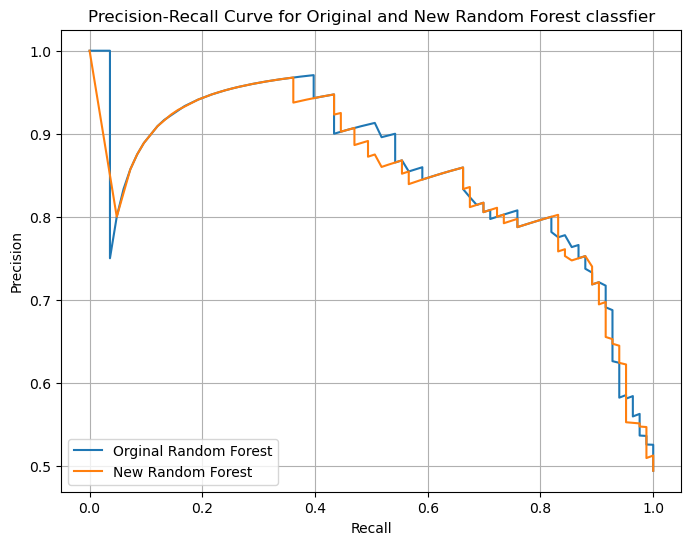

In [621]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Assuming you have y_true and y_scores for both Classifier A and Classifier B
y_true_a, y_scores_a = y_train, y_scores_forest
y_true_b, y_scores_b = y_train, y_scores_forest_new

# Calculate precision-recall curves for both classifiers
precision_a, recall_a, _ = precision_recall_curve(y_true_a, y_scores_a)
precision_b, recall_b, _ = precision_recall_curve(y_true_b, y_scores_b)

# Plot the precision-recall curves for both classifiers on the same graph
plt.figure(figsize=(8, 6))
plt.plot(recall_a, precision_a, label='Orginal Random Forest')
plt.plot(recall_b, precision_b, label='New Random Forest ')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Original and New Random Forest classfier')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


    The x-axis represents recall (sensitivity), which is the fraction of true positives out of all actual positives.
    The y-axis represents precision, which is the fraction of true positives out of all predicted positives
    The curve typically starts at (0,1) and moves toward the upper-right corner
    
    High Precision:

        When precision is high, it means that most of the positive predictions made by the classifier are indeed correct.
        The curve will be closer to the upper-right corner of the plot.
        
    High Recall:

        When recall is high, it means that the classifier is capturing a large portion of actual positive samples.
        The curve will be closer to the upper-left corner of the plot
    


        The AUC-PR measures the overall performance of the classifier across different threshold values.
        A higher AUC-PR indicates better classifier performance.


# Error Analysis

In [438]:
conf_mx = confusion_matrix(y_true, y_pred)
conf_mx

array([[28,  7],
       [ 7, 30]], dtype=int64)

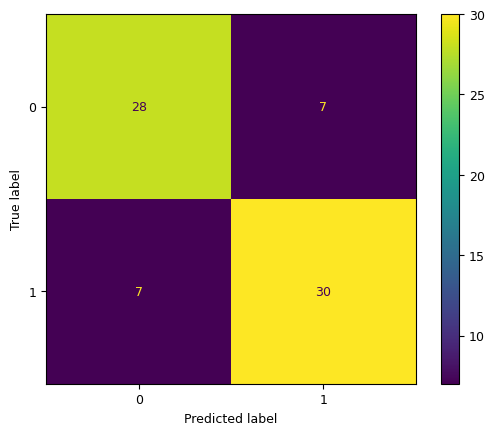

In [441]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_true = y_test 
y_pred = y_pred_rf  
plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()


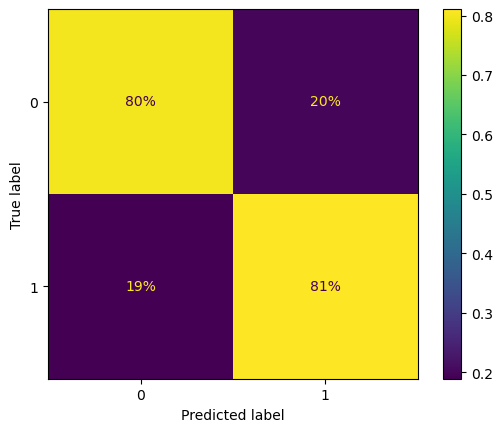

In [442]:
from sklearn.metrics import confusion_matrix
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                        normalize="true", values_format=".0%")
plt.show()


# HYPERPARAMETER TUNING

In [433]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


## RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=500),
        'max_features': randint(low=1, high=30),
        'bootstrap': [True, False]
    
    }

rnd_search = RandomizedSearchCV(ran_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(X,y)
rnd_search.best_score_

0.7958333333333334

In [484]:
rnd_search.best_params_

{'bootstrap': True, 'max_features': 12, 'n_estimators': 314}

## GridSearchCV

In [481]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 500],          
    'min_samples_split': [2, 5, 10 ],       # Minimum number of samples required to split a node
    'min_samples_leaf': [ 2, 4  ],         # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]             
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=ran_clf, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV instance to the data
grid_search.fit(X,y)

# Print the best hyperparameters and corresponding accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy Score:", best_score)

Best Hyperparameters: {'bootstrap': True, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Best Accuracy Score: 0.8125


**After hyperparameter tuning the best model so far is what we got after GridSearchCV , lets train it**

## training best model

In [512]:
best_rf_classifier = grid_search.best_estimator_
#  fiting  model with the best hyperparameters on entire dataset
best_rf_classifier.fit(X_train, y_train)


RandomForestClassifier(max_samples=100, min_samples_leaf=2, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=42)

In [521]:
grid_search.cv_results_

{'mean_fit_time': array([8.85782146e-01, 1.68987465e-01, 6.77185726e-01, 9.48898315e-02,
        1.72206306e-01, 6.13761520e-01, 9.77931976e-02, 1.65161276e-01,
        6.64130259e-01, 9.80005741e-02, 1.61500263e-01, 6.06496239e-01,
        9.52548504e-02, 1.66890287e-01, 5.95340633e-01, 1.02478123e-01,
        1.59750605e-01, 5.99949074e-01, 1.70454979e-03, 3.13029289e-03,
        3.12528610e-03, 3.12471390e-03, 3.12504768e-03, 8.24117661e-04,
        3.10897827e-03, 2.88834572e-03, 0.00000000e+00, 4.78053093e-03,
        3.00436020e-03, 0.00000000e+00, 0.00000000e+00, 3.20911407e-03,
        3.55567932e-03, 3.28736305e-03, 5.36441803e-04, 0.00000000e+00]),
 'std_fit_time': array([1.58169880e+00, 4.59899236e-03, 1.63549419e-01, 6.17134587e-03,
        2.45023026e-02, 1.55242816e-02, 3.43271725e-03, 5.37798019e-03,
        6.34465749e-02, 4.12200381e-03, 1.33495834e-02, 2.76411984e-02,
        2.53316658e-03, 7.19266537e-03, 1.18143436e-02, 4.35182038e-03,
        7.91555815e-03, 1.000

In [488]:
grid_search.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_samples=100, n_estimators=500,
                                              n_jobs=-1, oob_score=True,
                                              random_state=42),
             param_grid={'bootstrap': [True, False], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 500]},
             scoring='accuracy')>

In [514]:
y_pred_rf_best = best_rf_classifier.predict(X_test)

In [490]:
print("best_rf_classifier Classification Report:", "\n", classification_report(y_pred_rf_best , y_test ,target_names= ["Healthy","PD"] ))

best_rf_classifier Classification Report: 
               precision    recall  f1-score   support

     Healthy       0.80      0.82      0.81        34
          PD       0.84      0.82      0.83        38

    accuracy                           0.82        72
   macro avg       0.82      0.82      0.82        72
weighted avg       0.82      0.82      0.82        72



In [491]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("precision_score",precision_score(y_test,y_pred_rf_best))
print("recall_score",recall_score(y_test,y_pred_rf_best))
print("f1_score",f1_score(y_test,y_pred_rf_best))
print("roc_auc_score",roc_auc_score(y_test,y_pred_rf_best))

precision_score 0.8157894736842105
recall_score 0.8378378378378378
f1_score 0.8266666666666665
roc_auc_score 0.818918918918919


### oob_score_

In [523]:
best_rf_classifier.oob_score_

0.8095238095238095

our cross val score is improved a bit from 0.81 to 0.82`

In [495]:
y_scores_best = cross_val_predict(best_rf_classifier, X_train, y_train, cv=3 , method="predict_proba")
y_scores_forest_best = y_scores_best[:, 1] # we have taken only positive class's probability
roc_auc_best = roc_auc_score(y_train , y_scores_forest_best) 
roc_auc_best.round(2)

0.86

Our cross val score improved from 77 to 86 , this is fairly nice

In [547]:
feature_importance_list = [(name, score*100) for name, score in zip(df1.columns, best_rf_classifier.feature_importances_)]

sorted_feature_importance_list = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)
for name, score in sorted_feature_importance_list:
    print(name, ":", score)


Delta2 : 5.953279873823051
MFCC6 : 5.630143001350388
MFCC12 : 4.717973350618443
MFCC4 : 4.689036220093542
MFCC3 : 3.9270349318961997
MFCC11 : 3.88477296826861
Delta8 : 3.7140443311983664
Delta10 : 3.5366691013753706
Delta1 : 3.440877608999561
HNR25 : 3.1456753690757004
Delta11 : 3.03496042069662
HNR35 : 2.977512501537589
Delta6 : 2.9633267015651654
Delta0 : 2.9141828252588478
MFCC9 : 2.6822561299919623
Delta4 : 2.619613445184912
MFCC7 : 2.4702804690175006
Delta9 : 2.3342918188453066
MFCC2 : 2.2400821430199906
MFCC10 : 2.188938969153977
MFCC5 : 2.146252094421965
MFCC8 : 2.0983428485000606
GNE : 2.0811378113344348
Delta5 : 1.9600674122192379
HNR05 : 1.802966675874727
Shi_APQ11 : 1.6917481368412712
Delta3 : 1.5325942569621782
Delta7 : 1.450680310810708
MFCC1 : 1.3778979990711937
DFA : 1.3671491604671326
HNR15 : 1.3381411991788563
RPDE : 1.1758430660128476
Shim_loc : 1.0336217817417068
Jitter_abs : 0.9809190019202283
PPE : 0.9542749980737835
HNR38 : 0.9521656975702708
MFCC0 : 0.89305567124

In [548]:
pd.DataFrame(feature_importance_list).sort_values(by=1 , ascending=False)

0         1
36      Delta2  5.953280
27       MFCC6  5.630143
33      MFCC12  4.717973
25       MFCC4  4.689036
24       MFCC3  3.927035
32      MFCC11  3.884773
42      Delta8  3.714044
44     Delta10  3.536669
35      Delta1  3.440878
14       HNR25  3.145675
45     Delta11  3.034960
15       HNR35  2.977513
40      Delta6  2.963327
34      Delta0  2.914183
30       MFCC9  2.682256
38      Delta4  2.619613
28       MFCC7  2.470280
43      Delta9  2.334292
23       MFCC2  2.240082
31      MFCC10  2.188939
26       MFCC5  2.146252
29       MFCC8  2.098343
20         GNE  2.081138
39      Delta5  1.960067
12       HNR05  1.802967
11   Shi_APQ11  1.691748
37      Delta3  1.532594
41      Delta7  1.450680
22       MFCC1  1.377898
18         DFA  1.367149
13       HNR15  1.338141
17        RPDE  1.175843
7     Shim_loc  1.033622
4   Jitter_abs  0.980919
19         PPE  0.954275
16       HNR38  0.952166
21       MFCC0  0.893056
5   Jitter_RAP  0.843882
10   Shim_APQ5  0.843775
6   Jitter_PPQ  0.818363
8      Shim_dB  0.762265
9    Shim_APQ3  0.722522
2       Gender  0.709425
1       Status  0.519991
3   Jitter_rel  0.489170
0    Recording  0.388796

## ExtraTreesClassifier

In [497]:
from sklearn.ensemble import ExtraTreesClassifier
ext_clf = ExtraTreesClassifier(n_estimators=100,min_samples_leaf=4,  min_samples_split= 2, random_state=42)
ext_clf.fit(X_train , y_train)

ExtraTreesClassifier(min_samples_leaf=4, random_state=42)

In [500]:
y_ext_pred = ext_clf.predict(X_test)
accuracy_score(y_ext_pred , y_test)

0.8333333333333334

In [507]:
scores_ext = cross_val_score(ext_clf , X_train , y_train, cv=3, scoring='accuracy')
scores_ext.mean().round(3)

0.792

In [508]:
from sklearn.metrics import classification_report
print("ExtraTreesClassifier Classification Report:", "\n", classification_report(y_ext_pred , y_test ,  target_names= ["Healthy","PD"] ))


ExtraTreesClassifier Classification Report: 
               precision    recall  f1-score   support

     Healthy       0.80      0.85      0.82        33
          PD       0.86      0.82      0.84        39

    accuracy                           0.83        72
   macro avg       0.83      0.83      0.83        72
weighted avg       0.84      0.83      0.83        72



In [509]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 500],          # Number of trees in the forest
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]              # Whether to bootstrap samples when building trees
}

# Create a GridSearchCV instance
grid_search_2 = GridSearchCV(estimator=ext_clf, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV instance to the data
grid_search_2.fit(X,y)

# Print the best hyperparameters and corresponding accuracy score
best_params_2 = grid_search_2.best_params_
best_score_2 = grid_search_2.best_score_

print("Best Hyperparameters:", best_params_2)
print("Best Accuracy Score:", best_score_2)

Best Hyperparameters: {'bootstrap': False, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Accuracy Score: 0.8125


In [549]:
best_ext_classifier = grid_search_2.best_estimator_
best_ext_classifier.fit(X_train, y_train)


ExtraTreesClassifier(min_samples_leaf=2, min_samples_split=10, n_estimators=50,
                     random_state=42)

In [550]:
y_ext_pred_best = best_ext_classifier.predict(X_test)

In [551]:
scores_best_ext = cross_val_score(best_ext_classifier , X_train , y_train, cv=3, scoring='accuracy')
scores_best_ext.mean().round(3)

0.798

In [585]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
voting_clf = VotingClassifier(estimators=[
    ("random_clf" , best_rf_classifier),
       ("SVM" , SVC()),
    ("Log_reg" , LogisticRegression(penalty="l1",max_iter=300,solver="liblinear"))
] ,voting='hard')

In [586]:
voting_clf.fit(X_train , y_train)

VotingClassifier(estimators=[('random_clf',
                              RandomForestClassifier(max_samples=100,
                                                     min_samples_leaf=2,
                                                     n_estimators=500,
                                                     n_jobs=-1, oob_score=True,
                                                     random_state=42)),
                             ('SVM', SVC()),
                             ('Log_reg',
                              LogisticRegression(max_iter=300, penalty='l1',
                                                 solver='liblinear'))])

In [587]:
scores_voting_clf = cross_val_score(voting_clf , X_train , y_train, cv=3, scoring='accuracy')
scores_voting_clf.mean().round(3)

0.804

In [588]:
y_VC_pred =voting_clf.predict(X_test)

In [589]:
print("ExtraTreesClassifier Classification Report:", "\n", classification_report(y_VC_pred , y_test ,  target_names= ["Healthy","PD"] ))


ExtraTreesClassifier Classification Report: 
               precision    recall  f1-score   support

     Healthy       0.83      0.81      0.82        36
          PD       0.81      0.83      0.82        36

    accuracy                           0.82        72
   macro avg       0.82      0.82      0.82        72
weighted avg       0.82      0.82      0.82        72



#### out of the above models Random forest with tunning is best 

In [557]:
best_rf_classifier

RandomForestClassifier(max_samples=100, min_samples_leaf=2, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=42)

In [558]:
tree_explainer = shap.TreeExplainer(best_rf_classifier)
tree_shap_values = tree_explainer.shap_values(X)
shap.initjs() #initialize javascript in cell

In [559]:
tree_shap_values

[array([[-4.74218201e-03,  8.71734536e-03,  3.72206953e-03, ...,
          1.84865852e-02,  1.98509633e-02,  1.28435870e-02],
        [ 2.26195540e-03,  7.95680225e-03,  3.67204442e-03, ...,
         -3.96615033e-03,  2.01846837e-02, -2.58156471e-03],
        [ 3.24629986e-03,  9.67385661e-03,  2.54171535e-03, ...,
          1.14410935e-02,  1.30691788e-02, -1.19702717e-02],
        ...,
        [-2.59695437e-03, -7.12961856e-03,  2.50832914e-03, ...,
          8.94765769e-03,  1.81447644e-02,  2.76532963e-02],
        [ 3.54318747e-06, -4.55540637e-03,  1.43791638e-03, ...,
         -2.68350474e-03,  1.55166114e-02, -1.32275678e-02],
        [ 2.10137710e-03, -6.89015108e-03,  1.30230018e-03, ...,
          7.40943571e-03,  2.85158823e-03,  1.77205479e-02]]),
 array([[ 4.74218201e-03, -8.71734536e-03, -3.72206953e-03, ...,
         -1.84865852e-02, -1.98509633e-02, -1.28435870e-02],
        [-2.26195540e-03, -7.95680225e-03, -3.67204442e-03, ...,
          3.96615033e-03, -2.01846837e

   
   **Positive Values:**

        Positive SHAP values indicate that a feature pushed the prediction toward a higher value (i.e., the model's prediction is larger due to this feature).
        The larger the positive SHAP value, the more influence the feature had in increasing the prediction.
        
    
   **Negative Values:**

        Negative SHAP values indicate that a feature pushed the prediction toward a lower value (i.e., the model's prediction is smaller due to this feature).
        The more negative the SHAP value, the more influence the feature had in decreasing the prediction.
        
   **Magnitude of Values:**

        The magnitude (absolute value) of SHAP values indicates the overall impact of a feature.
        Larger magnitude SHAP values suggest that the corresponding feature had a substantial influence on the prediction, regardless of whether it was positive or negative.

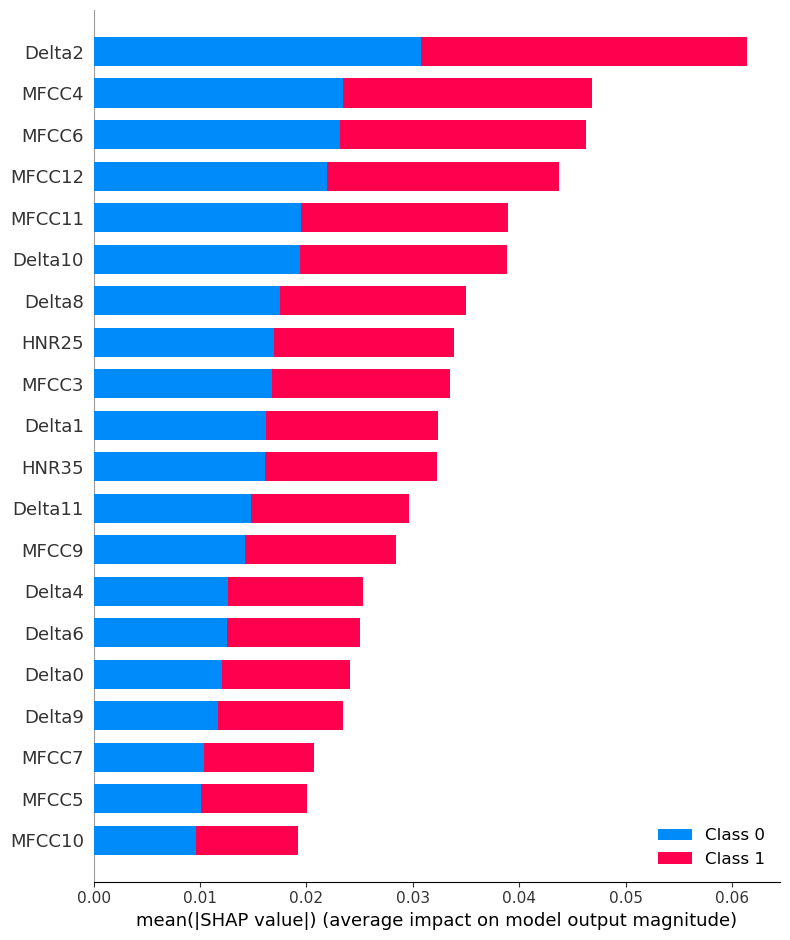

In [569]:
# Summarize the SHAP values
shap.summary_plot(tree_shap_values ,feature_names = df1.columns , )

In [571]:
# Optionally, you can also print the expected value (base value) of the model
print("Expected Value (Base Value):", tree_explainer.expected_value)


Expected Value (Base Value): [0.50976 0.49024]


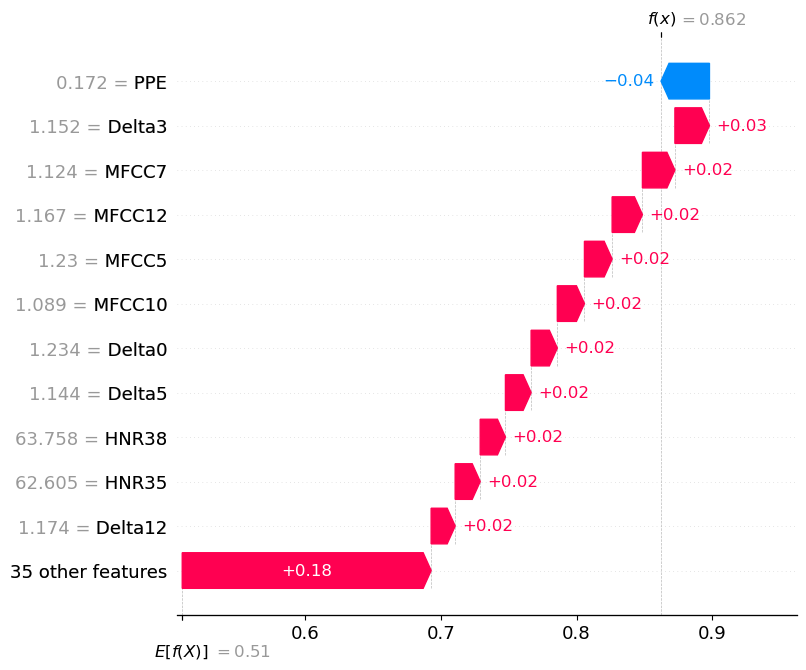

In [572]:
row = 11
shap.waterfall_plot(shap.Explanation(values=tree_shap_values[0][row], 
                                              base_values=tree_explainer.expected_value[0], data=X_test.iloc[row],  
                                         feature_names=X_test.columns.tolist()) , max_display = 12)

    base_values = f(x) = 0.86
    Longer bars indicate a larger impact on the prediction, whether positive or negative.
    with the most influential features at the top and the least influential at the bottom.

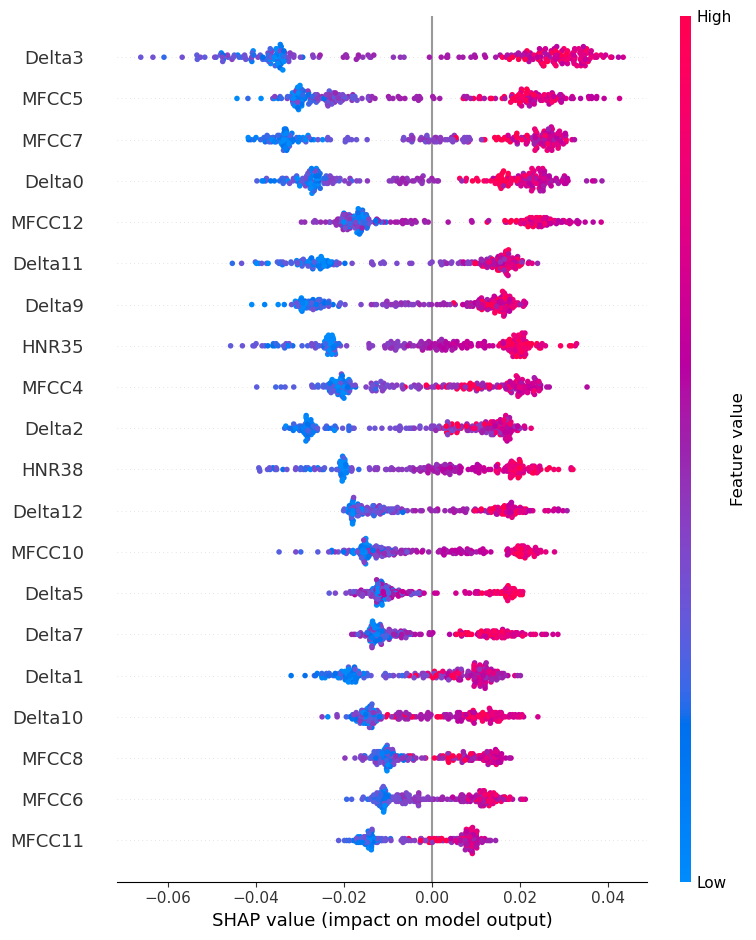

In [573]:
shap.summary_plot(tree_shap_values[0], X.values, feature_names = X.columns )

In [623]:
#muultiple force plot
shap.initjs() #initialize javascript in cell
shap.force_plot(tree_explainer.expected_value[0], tree_shap_values[1],feature_names = X.columns)
